<a href="https://colab.research.google.com/github/ManishSuhas0026/Deep-Learning/blob/main/2348530_DL_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 4.0 MB/s eta 0:00:00


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from kerastuner.tuners import RandomSearch
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from kerastuner.tuners import RandomSearch

In [4]:
df= pd.read_csv('/content/credit_card_fraud.csv')

In [5]:
df.shape

(8000, 20)

In [6]:
df.head(5)

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,2022-09-24 13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,04/29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,None,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,2020-07-24 11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,03/26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,None,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,2023-03-18 01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,11/29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,2021-01-07 21:53:04,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,09/25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,2021-12-16 06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,03/31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...


In [21]:
df.columns

Index(['Transaction Date and Time', 'Transaction Amount', 'Cardholder Name',
       'Card Number (Hashed or Encrypted)', 'Merchant Name',
       'Merchant Category Code (MCC)',
       'Transaction Location (City or ZIP Code)', 'Transaction Currency',
       'Card Type', 'Card Expiration Date', 'CVV Code (Hashed or Encrypted)',
       'Transaction Response Code', 'Transaction ID', 'Fraud Flag or Label',
       'Previous Transactions', 'Transaction Source', 'IP Address',
       'Device Information', 'User Account Information', 'Transaction Notes'],
      dtype='object')

In [24]:
df =df.drop (columns=['Cardholder Name', 'User Account Information', 'Card Number (Hashed or Encrypted)', 'Card Expiration Date', 'CVV Code (Hashed or Encrypted)', 'Transaction ID'])

In [25]:
df.isnull().sum()

Transaction Date and Time                  0
Transaction Amount                         0
Merchant Name                              0
Merchant Category Code (MCC)               0
Transaction Location (City or ZIP Code)    0
Transaction Currency                       0
Card Type                                  0
Transaction Response Code                  0
Fraud Flag or Label                        0
Previous Transactions                      0
Transaction Source                         0
IP Address                                 0
Device Information                         0
Transaction Notes                          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Transaction Date and Time                8000 non-null   object 
 1   Transaction Amount                       8000 non-null   float64
 2   Cardholder Name                          8000 non-null   object 
 3   Card Number (Hashed or Encrypted)        8000 non-null   object 
 4   Merchant Name                            8000 non-null   object 
 5   Merchant Category Code (MCC)             8000 non-null   int64  
 6   Transaction Location (City or ZIP Code)  8000 non-null   object 
 7   Transaction Currency                     8000 non-null   object 
 8   Card Type                                8000 non-null   object 
 9   Card Expiration Date                     8000 non-null   object 
 10  CVV Code (Hashed or Encrypted)           8000 no

In [26]:
X = df.drop(columns=['Fraud Flag or Label'])
y = df['Fraud Flag or Label']

In [27]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

In [39]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
from kerastuner import HyperModel

class MyHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units_layer_1', min_value=32, max_value=512, step=32),
                        activation='relu', input_shape=self.input_shape))
        model.add(Dense(units=hp.Int('units_layer_2', min_value=32, max_value=512, step=32),
                        activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd'])

        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

        if optimizer_choice == 'adam':
            optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
        else:
            optimizer = tf.keras.optimizers.SGD(learning_rate=hp_learning_rate)

        model.compile(optimizer=optimizer,
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        return model

In [32]:
tuner = RandomSearch(
    MyHyperModel(input_shape=(X_train.shape[1],)),
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='creditcard')

tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 10 Complete [00h 00m 27s]
val_accuracy: 0.5132812261581421

Best val_accuracy So Far: 0.5210937261581421
Total elapsed time: 00h 18m 57s


Epoch 1/50
160/160 [==============================] - 16s 98ms/step - loss: 0.6975 - accuracy: 0.4930 - val_loss: 0.6938 - val_accuracy: 0.4977
Epoch 2/50
160/160 [==============================] - 13s 84ms/step - loss: 0.5887 - accuracy: 0.6736 - val_loss: 0.7988 - val_accuracy: 0.4852
Epoch 3/50
160/160 [==============================] - 13s 81ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 1.5277 - val_accuracy: 0.4773
Epoch 4/50
160/160 [==============================] - 13s 81ms/step - loss: 2.2599e-04 - accuracy: 1.0000 - val_loss: 1.5586 - val_accuracy: 0.4781
Epoch 5/50
160/160 [==============================] - 13s 79ms/step - loss: 3.1559e-06 - accuracy: 1.0000 - val_loss: 1.5863 - val_accuracy: 0.4773
Epoch 6/50
160/160 [==============================] - 13s 81ms/step - loss: 2.2519e-06 - accuracy: 1.0000 - val_loss: 1.6065 - val_accuracy: 0.4789
Epoch 7/50
160/160 [==============================] - 18s 110ms/step - loss: 1.7211e-06 - accuracy: 1.0000 - val_loss: 1.624

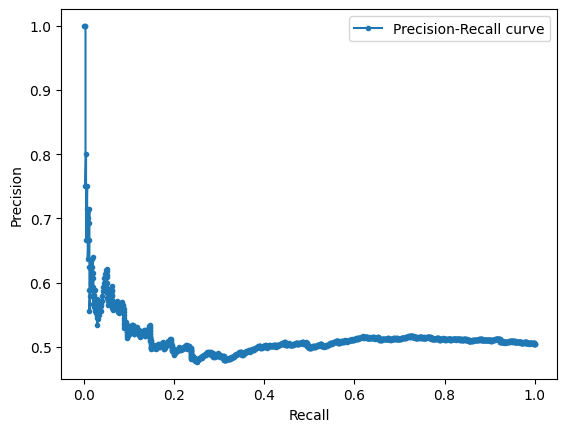

In [41]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)
y_pred = model.predict(X_test).ravel()
y_pred_class = (y_pred > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)

precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall_vals, precision_vals, marker='.', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()